BIGMART DATA

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [43]:
test=pd.read_csv("bigdatamart_Train.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
test.shape

(8523, 12)

In [46]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

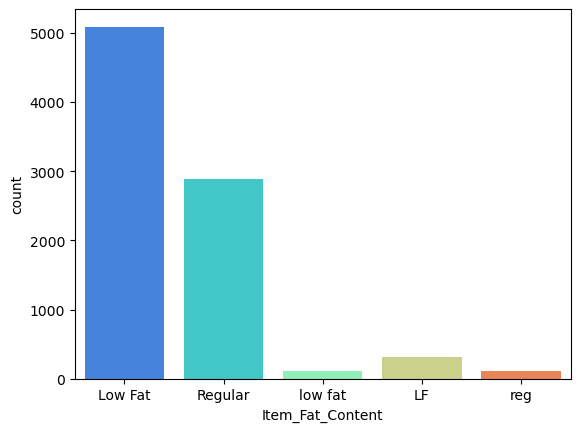

In [47]:
sns.countplot(x=test['Item_Fat_Content'],palette='rainbow')

In [48]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [49]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [50]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('LF','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('low fat','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg','Regular')

In [51]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [52]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

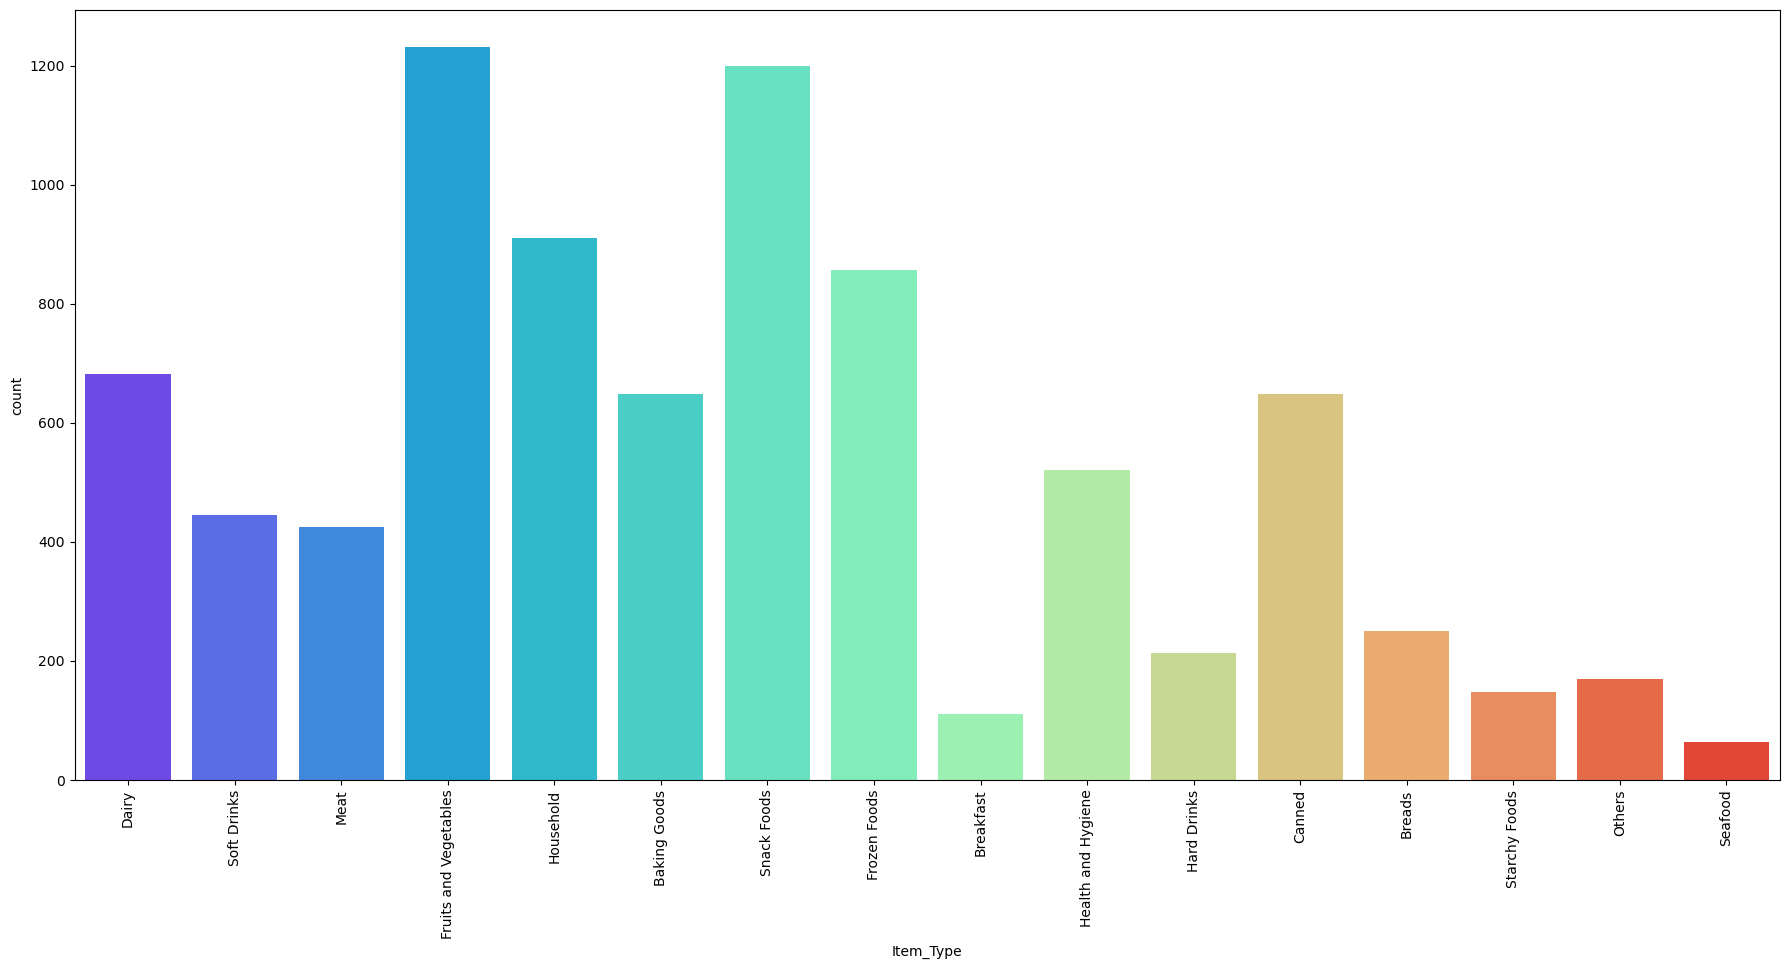

In [53]:
plt.figure(figsize=(22,10))
sns.countplot(x=test['Item_Type'], palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [54]:
test['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [55]:
test['Item_Type_Combined']=test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined']=test['Item_Type_Combined'].map({'FD':'Food',
                                                          'NC':'Non-consumble',
                                                          'DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food             6125
Non-consumble    1599
Drinks            799
Name: count, dtype: int64

In [56]:
test.loc[test['Item_Type_Combined']=='Non-consumble','Item_Fat_Content'].unique()

array(['Low Fat'], dtype=object)

In [57]:
test.loc[test['Item_Type_Combined']=='Non-consumble','Item_Fat_Content']='Non-Edible'
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

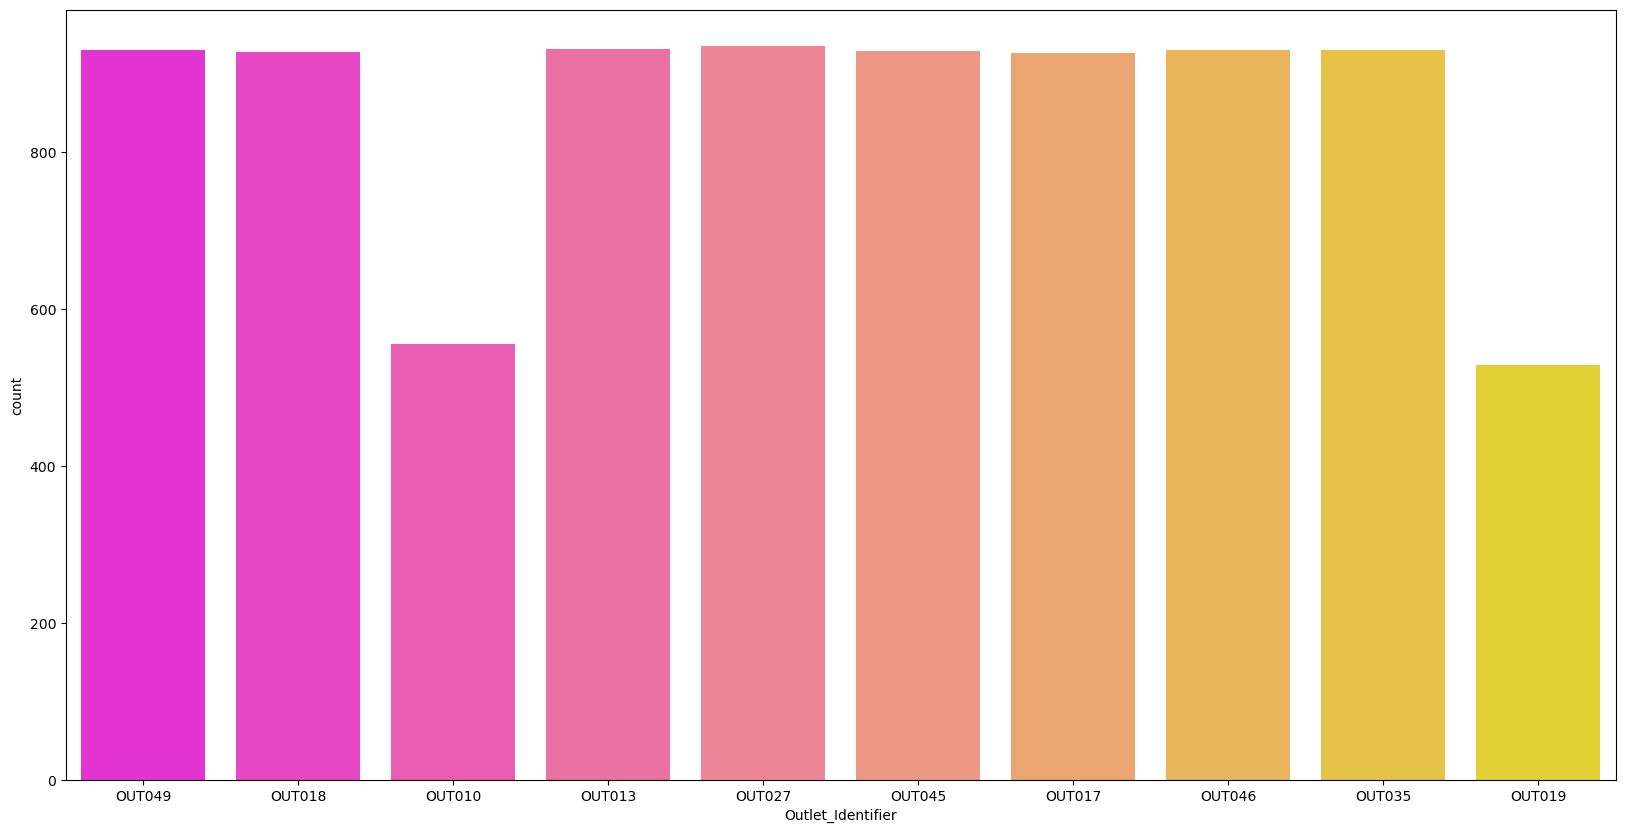

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(x=test['Outlet_Identifier'],palette='spring')

In [59]:
test['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<Axes: xlabel='Outlet_Type', ylabel='count'>

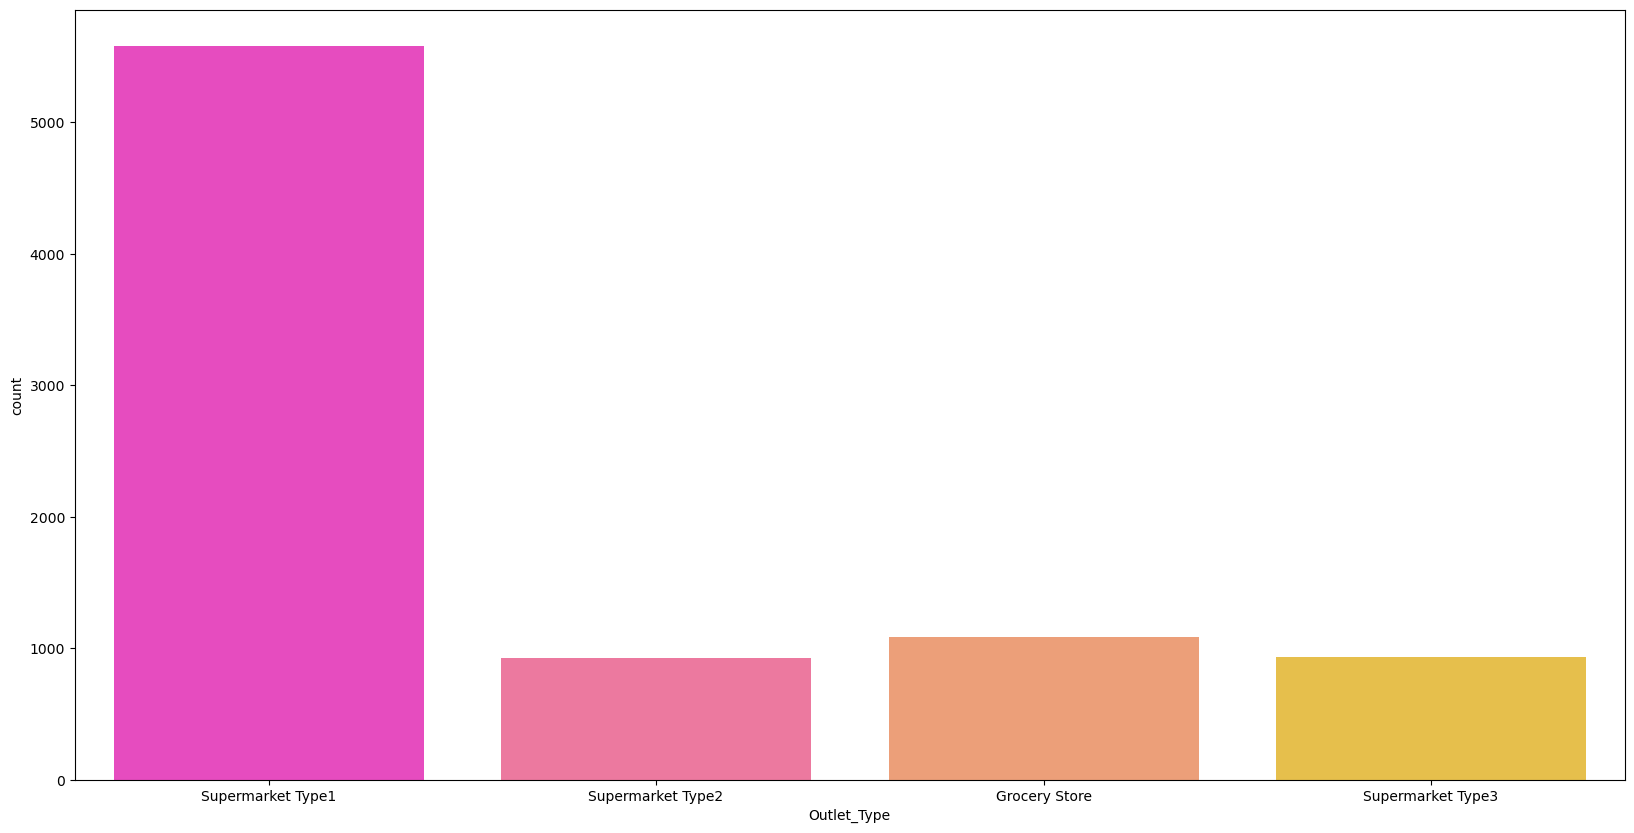

In [60]:
plt.figure(figsize=(20,10))
sns.countplot(x=test['Outlet_Type'],palette='spring')

In [61]:
test['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

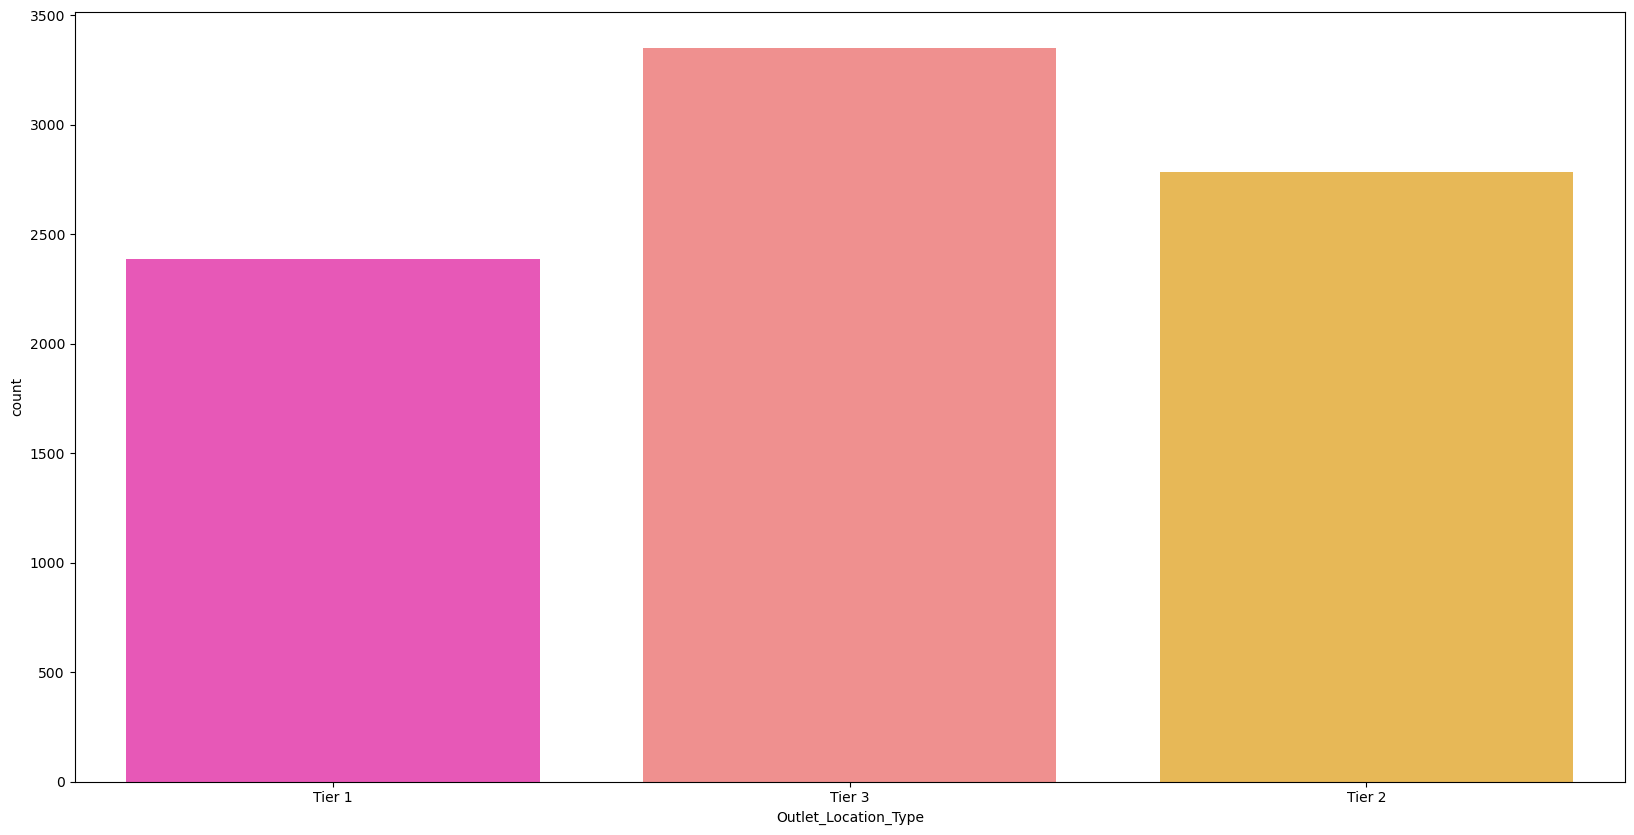

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(x=test['Outlet_Location_Type'],palette='spring')

In [63]:
test['Item_Weight'].isnull().sum()

1463

In [64]:
mean_item=test.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_item

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [65]:
mean_zip=dict(zip(mean_item.index,mean_item.Item_Weight))

test['mean_zip']=test['Item_Type'].map(mean_zip)
test['Item_Weight']=test['Item_Weight'].fillna(test['mean_zip'])

In [66]:
test['Item_Weight'].isna().sum()

0

In [67]:
test['Outlet_Size'].isna().sum()

2410

<Axes: xlabel='Outlet_Size', ylabel='count'>

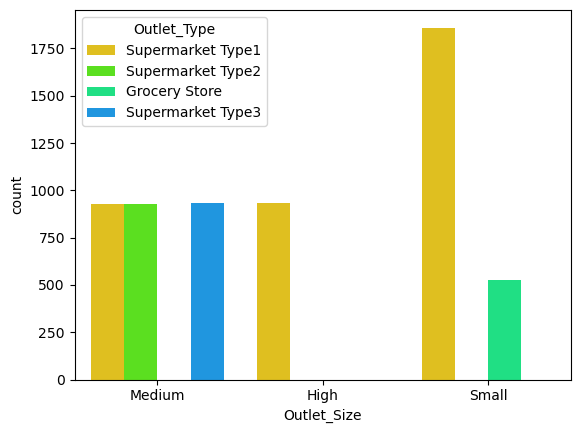

In [68]:
sns.countplot(x=test['Outlet_Size'],hue='Outlet_Type',data=test)

In [69]:
test.groupby('Outlet_Size')['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: count, dtype: int64

In [70]:
#from scipy.stats import mode
#outlet_size_mode=test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
#outlet_size_mode

In [71]:
test['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [72]:
test[test['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [73]:
test['Item_Visibility']=test['Item_Visibility'].replace(0,np.nan)

In [74]:
test['Item_Visibility'].fillna(test['Item_Visibility'].median(),inplace=True)

In [75]:
test[test['Item_Visibility']==0]['Item_Identifier'].nunique()

0

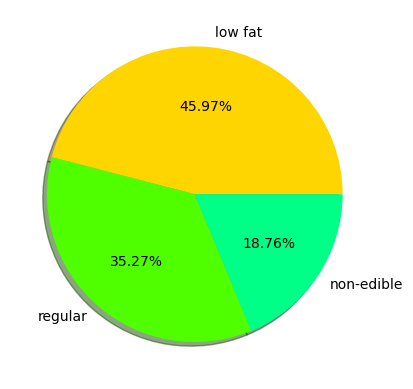

In [76]:
labels ='low fat','regular','non-edible'
fig,ax=plt.subplots()
ax.pie(test.Item_Fat_Content.value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)
plt.show()

In [77]:
'''sns.set_palette('hsv')
plt.figure(figsize=(8,6))

sns.swarmplot(data=test,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type')'''

"sns.set_palette('hsv')\nplt.figure(figsize=(8,6))\n\nsns.swarmplot(data=test,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type')"

In [78]:
test[Outlet_Size].isna().sum()

NameError: name 'Outlet_Size' is not defined

In [ ]:
labels='medium','small','high'
fig,ax=plt.subplots()
ax.pie(test.Outlet_Size.value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)
plt.show()

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='Item_Tpye',y='Item_Ooutlet_Sales',data=test,palette='gist_rainbow_r')
plt.xlabel('Item_Type',fontsize=14)
plt.show()